# Assignment 1 - Algorithms in Molecular Biology
## Kleanthi Voutsadaki - DS2190003

- #### Exercise 1
Implementation of FrequentWordDict function

In [1]:
import numpy
import itertools

def GenerateKmers(k):
    bases=['A','T','G','C']
    kmers=[]
    
    for p in itertools.product(bases, repeat=k):
        kmers.append(str(''.join(p)))
    
    return kmers
    
def DefinePattern(text,k):
    text_length = len(text)
    pattern=[]
    for i in range(0, text_length-k+1):
        pattern.append( text[i:i+k])
        
    return pattern
    
    
    
def PatternToNumber(text,k):
    kmers=GenerateKmers(k)
    a=0
    index=[]
    pattern=DefinePattern(text,k)
    for i in pattern:
        for kmer_index in range(len(kmers)):
            if i == kmers[kmer_index]:
                index.append(kmer_index)
                
        
    return index
      
       

def FrequentWordDict(text,k):
    farray = []
    constant=1
    for i in range(4**k):
        farray.append(0)
        
    
    index=PatternToNumber(text,k)
    kmers=GenerateKmers(k)
    for i in index:
        constant+=1
        for kmers_index in range(len(kmers)):
            constant+=1
            if i==kmers_index:
                farray[kmers_index]=farray[kmers_index]+1
                
    
    final_array=list(zip(kmers,farray))
    return (final_array,constant)
        


Implementation of FrequentWords function

In [2]:
def PatternCount(text, pattern):
    
    count = 0;
    pattern_length = len(pattern)
    text_length = len(text)
    for i in range(0, text_length-pattern_length+1):
        
        if (text[i:i+pattern_length]==pattern):
            count = count + 1
            
        
    return count   


import numpy

def FrequentWords(text, k):
    #faster way to find k-mers
   #frequent_patterns = list()
   
    frequent_patterns = set()
    text_length = len(text)
    count=numpy.zeros(text_length-k+1)
    counter=1
   # calcuate word frequency
    for i in range(0, text_length-k+1):
        counter+=1
        
        pattern = text[i:i+k]
        count[i] = PatternCount(text, pattern)

   # maximum frequency 
    max_count = max(count)
    
   # add words with max frequency to frequent_patterns
    for i in range(0, text_length-k+1):
        
        
        if (count[i]==max_count):
            frequent_patterns.add(text[i:i+k])
            
         #frequent_patterns.append(text[i:i+k])
                          
    return(frequent_patterns,max_count,counter)


Compare the performance of FrequentWordsDict and FrequentWords
            

Generate Random Strings

In [3]:
#creating random DNA strings
import random

def CreateRandStr(alphabet,str_len):
    rand_str = "" #create an empty string
    chr_cnt = 0 #how many characters of the string we have determined so far
    while chr_cnt < str_len:
        rand_str = rand_str + alphabet[random.randint(0,len(alphabet)-1)]
        chr_cnt = chr_cnt + 1
    return rand_str

In [4]:
#writing them in files
def WriteFile(filename,l):
    f= open(filename,"w+")
    string=CreateRandStr("ACGT",l)
    f.write(str(string))
    f.close
    return
WriteFile('len10.txt',10)
WriteFile('len100.txt',100)
WriteFile('len1000.txt',1000)
WriteFile('len10000.txt',10000)


In [5]:
#reading the random dna strings files
def readFile(filename):
    
    f=open(filename,'r')
    strings=f.read()
    return(strings)




In [6]:
#examine the performance

%matplotlib inline
import matplotlib.pyplot as plt
import random
import timeit
lens=[10,100,1000,10000]
#times for FrequentWords
ftimes=[]
fcounter=[]
#times for FrequentWordsDict 
dtimes=[]
dcounter=[]
for l in lens:
    k=2
    #Read file
    
    filename='len' + str(l) + '.txt'
    dna_sample=readFile(filename)
    start=timeit.default_timer()
    result = FrequentWords(dna_sample,k)
    frequent_patterns= result[0] 
    counter = result[2]
    stop=timeit.default_timer()
    ftimes.append(stop-start)
    fcounter.append(counter)
    print("Frequent Words for length " +str(l)+'  ' + str(stop - start) + " seconds")
    print("counter: " + str(counter))

    start = timeit.default_timer()
    result = FrequentWordDict(dna_sample,k)
    frequent_patterns= result[0]
    counter = result[1]
    stop=timeit.default_timer()
    dtimes.append(stop-start)
    dcounter.append(counter)
    print("FrequentWordDict for length "+str(l)+'  ' + str(stop - start) + " seconds")
    print("counter: " + str(counter))


Frequent Words for length 10  5.572400004894007e-05 seconds
counter: 10
FrequentWordDict for length 10  6.228900019777939e-05 seconds
counter: 154
Frequent Words for length 100  0.0017006020007102052 seconds
counter: 100
FrequentWordDict for length 100  0.000334246000420535 seconds
counter: 1684
Frequent Words for length 1000  0.18209732200011786 seconds
counter: 1000
FrequentWordDict for length 1000  0.002849990998583962 seconds
counter: 16984
Frequent Words for length 10000  18.154677931999686 seconds
counter: 10000
FrequentWordDict for length 10000  0.02893251000023156 seconds
counter: 169984


### Graphical Plot of the results:

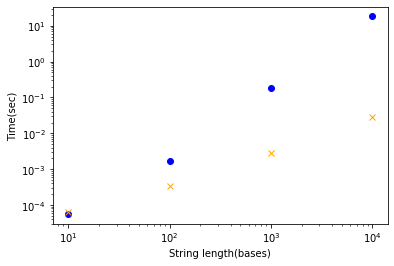

In [8]:
plt.xlabel('String length(bases)')
plt.ylabel('Time(sec)')
plt.xscale("log")
plt.yscale("log")
plt.plot(lens,ftimes,'o', color='blue')
plt.plot(lens,dtimes,'x',color='orange')
plt.show()

From the above analysis we can conclude that the FrequentWordDict algorithm has a higher complexity than the FrequentWords, which is shown by the counter index. The most complex algorithm has quadratic complexity O(n^2) and the less complex has linear complexity O(n). Nevertheless, it is clear that the most complex algorithm gives very quick results(orange cross in the plot) in relation to the simple algorithm(blue bullet in the plot). As the data, which are given as input, increase there is significant difference in the performance time of the two algorithms.  

- #### Exercise 2


A way to avoid generating 4^k k-mers when finding frequent k-mers with mismatches is to generate all possible candidate solutions, that is all possible k-mers with all their possible mismatches for every k-mer. To be more specific, having one original k-mer pattern, we will substitute each base with every possible base (A,C,G,T) and generate a completely different and relative k-mer to the original one. Afterwards, we can take each generated k-mer as a slide window and search all the text, to see if it exists and count it in a score matrix. 